In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [246]:
covid_data = pd.read_csv('covidworld.csv')
covid_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,12/04/2020,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
1,11/04/2020,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
2,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
3,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
4,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
10327,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10328,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
10329,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10330,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [247]:
print('Covid-19 info in Thailand')

thailand = covid_data['geoId']=='TH'
THdata = covid_data[thailand]

THcase=THdata['cases']
THttcase = np.sum(THcase)
print('Thailand total cases is:',THttcase) 

THdeath=THdata['deaths']
THttdeath = np.sum(THdeath)
print('Thailand total deaths is:',THttdeath) 

caseperpop = (THttcase/69428524)*100
print('Percent of cases per population of Thailand is:',caseperpop)

diepercas = (THttdeath/THttcase)*100
print('Percent of deaths per cases of Thailand is:',diepercas)

Covid-19 info in Thailand
Thailand total cases is: 2551
Thailand total deaths is: 38
Percent of cases per population of Thailand is: 0.003674282345394524
Percent of deaths per cases of Thailand is: 1.4896119168953352


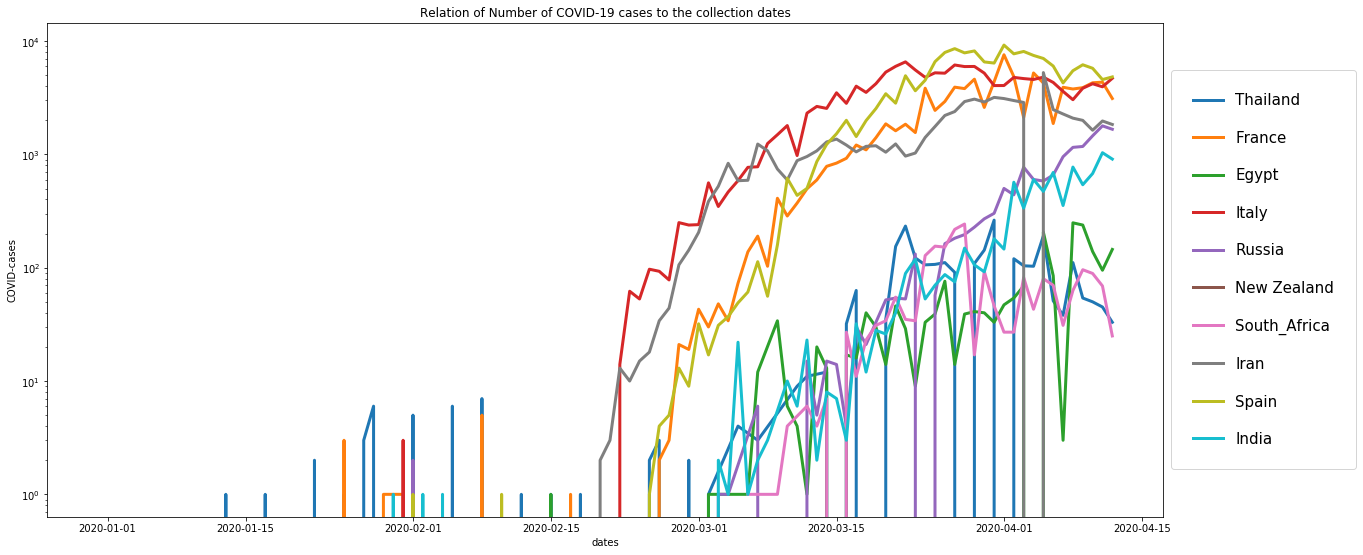

In [248]:
day = covid_data["dateRep"].values
x = []
for d in day:
  daymonthyear = d.split("/")
  datetime_daymonthyear = dt.datetime(int(daymonthyear[2]), int(daymonthyear[1]), int(daymonthyear[0]))
  x.append(datetime_daymonthyear.date())
covid_data["dateRep"] = x


def printCOVIDData(geoId):
  fig = plt.figure(figsize=(20, 20))
  ax = fig.add_subplot(2, 1, 1)
  ax.set_yscale('log')

  for id in geoId:
    country = covid_data['countriesAndTerritories']==id
    data = covid_data[country]

    data = data.sort_values(by='dateRep')
    y = data["cases"]
    x = data["dateRep"]
    ax.plot(x,y,label=id,linewidth=3.0)

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15},borderpad=1.5,labelspacing=1.5)
  plt.ylabel('COVID-cases')
  plt.xlabel('dates')
  plt.title('Relation of Number of COVID-19 cases to the collection dates', fontdict=None, loc='center', )

  plt.show()

printCOVIDData(['Thailand','France','Egypt','Italy','Russia','New Zealand','South_Africa','Iran','Spain','India'])



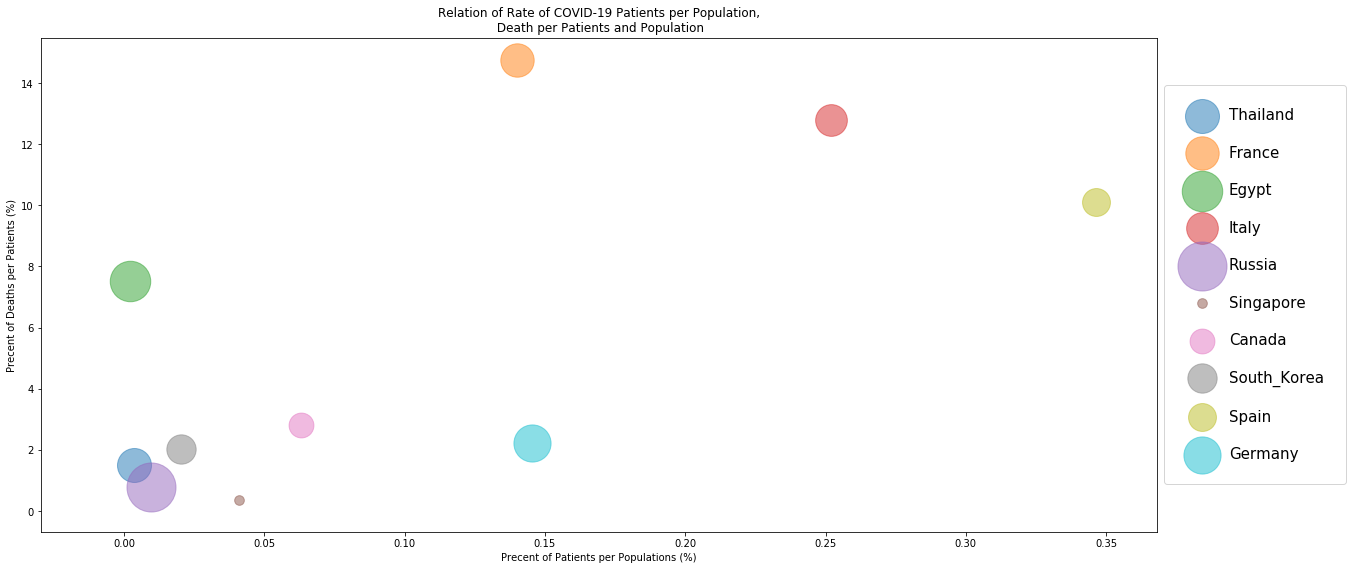

In [249]:
def printCOVIDDeathRateData(geoId):
  fig = plt.figure(figsize=(20, 20))
  ax = fig.add_subplot(2, 1, 1)

  for id in geoId:
    country = covid_data['countriesAndTerritories']==id
    data = covid_data[country]

    totalCases = data["cases"].sum()
    totalDeaths = data["deaths"].sum()
    totalPops = data["popData2018"].values[0]

    caseperpop = (totalCases/totalPops)*100
    deathpercase = (totalDeaths/totalCases)*100
    ax.scatter([caseperpop],[deathpercase],label=id, alpha=0.5,s=totalPops / 60000)

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15},borderpad=1.5,labelspacing=1.5)
  plt.ylabel('Precent of Deaths per Patients (%)')
  plt.xlabel('Precent of Patients per Populations (%)')
  plt.title('Relation of Rate of COVID-19 Patients per Population,\n Death per Patients and Population', fontdict=None, loc='center', )

  plt.show()

printCOVIDDeathRateData(['Thailand','France','Egypt','Italy','Russia','Singapore','Canada','South_Korea','Spain','Germany'])
